<a href="https://colab.research.google.com/github/theweird-kid/ML-Notes/blob/main/Models/Implementing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression From Scratch
Y = wX + b
* w -> weight vector
* X -> Feature vector
* Y -> Hypothesis
* v -> bias

# Gradient Descent (Update Rule)
w = w - L(dw) \
b = b - L(db) \
L -> Learning Rate \

dw = (-2/n)Sum{xi*(yi-ypre)} \
db = (-2/n)Sum{yi-ypre} \

In [1]:
# Import basic Dependencies
import numpy as np
import matplotlib.pyplot as plt

**Linear Regression**

In [2]:
class Linear_Regression:

  # Initializing Hyperparameters: Learning Rate, No. of Iterations
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    # Number of training examples & number of features
    self.m, self.n = X.shape    # No. of rows & columns

    # Initialize the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # Implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self,):

    Y_prediction = self.predict(self.X)

    # Calculate Gradients
    dw = (-2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m    # weights
    db = (-2 * np.sum(self.Y - Y_prediction)) / self.m            # bias

    # Update the weights
    self.w = self.w - self.learning_rate * dw                     # weights
    self.b = self.b - self.learning_rate * db                     # bias

  def predict(self, X):
    return X.dot(self.w) + self.b

**Using the model for prediction**

In [3]:
# importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Preprocessing

In [4]:
# loading data into a pandas DataFrame
salary_df = pd.read_csv('/content/salary_data.csv')

In [8]:
# preview the data
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
salary_df.shape

(30, 2)

In [10]:
# Checking for missing values
salary_df.isnull().sum()

,0
YearsExperience,0
Salary,0


**No Missing Values**

In [11]:
# Splitting the Target & Features
X = salary_df.iloc[:, :-1].values
Y = salary_df.iloc[:, -1].values

In [12]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [14]:
# Splitting the data into train & test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

**Training the Linear Regression Model**

In [15]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [16]:
# Fit the Data into the model (Learning)
model.fit(X_train, Y_train)

In [17]:
# printing the Parameter values (weights & bias)
print('weight = ', model.w)
print('bias = ', model.b)

weight =  [9514.40099904]
bias =  23697.406507136307


In [19]:
# Predicting the salaries for the test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the Pridicted values and actual values

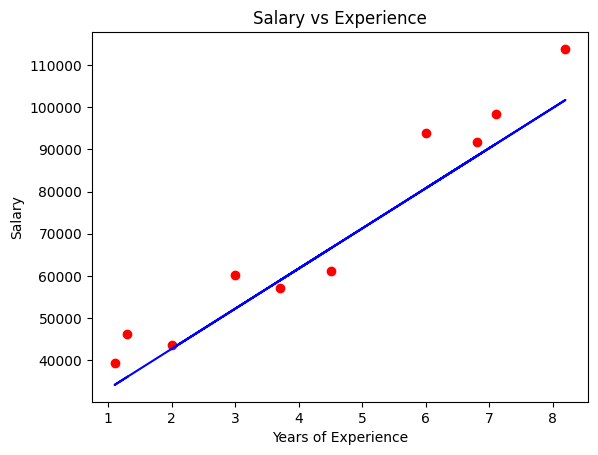

In [21]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()